In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

## Data Preparation and Cleaning

In [28]:
customer = pd.read_csv('../Datasets/Case Study - Customer.csv',sep=';')
product = pd.read_csv('../Datasets/Case Study - Product.csv',sep=';')
transaction = pd.read_csv('../Datasets/Case Study - Transaction.csv',sep=';')
store = pd.read_csv('../Datasets/Case Study - Store.csv',sep=';')

# transaction.head()
# customer.head()
# product.head()
# store.head()

In [29]:
# Mengubah tipe data kolom Date pada dataset transaction menjadi datetime
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

# Mengisi missing value dengan nilai sebelumnya
customer.isna().sum()
customer.fillna(method='ffill', inplace=True)

# membuat tabel utama baru dengan menggabungkan semua tabel
main_table = pd.DataFrame()
main_table = pd.merge(transaction, customer, how='left', on='CustomerID')
main_table = pd.merge(main_table, product, how='left', on='ProductID')
main_table = pd.merge(main_table, store, how='left', on='StoreID')
# main_table.info()
# main_table.isna().sum()
main_table.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,"14,58",Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,"0,18",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,"12,57",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,"6,95",Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


## Grafik

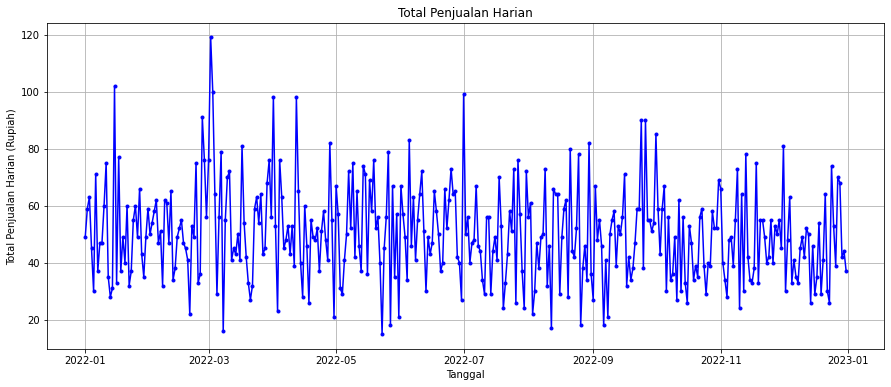

In [30]:
# Mengelompokkan data berdasarkan tanggal dan menghitung total penjualan harian
daily_sales = main_table.groupby('Date')['Qty'].sum()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='.', linestyle='-', color='b')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan Harian (Rupiah)')
plt.title('Total Penjualan Harian')
plt.grid(True)
plt.show()

(4, 1, 1)


c:\Users\Nanda\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Nanda\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


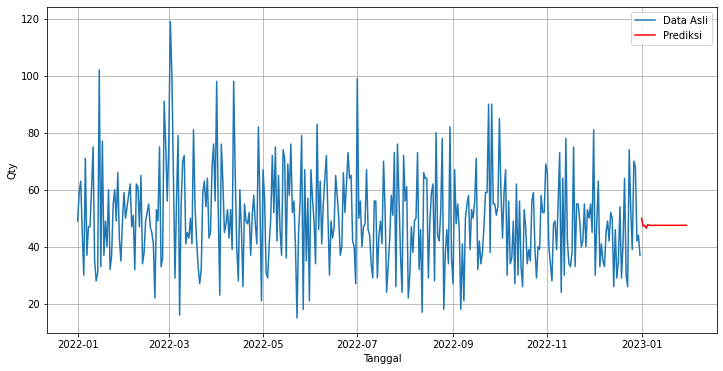

In [31]:
arima_parameter = auto_arima(daily_sales, seasonal=True, stepwise=True)
print(arima_parameter.order)  # Menampilkan parameter terbaik

p, d, q = arima_parameter.order
model = SARIMAX(daily_sales, order=(p, d, q))
model_fit = model.fit()

# Prediksi
predictions = model_fit.forecast(steps=30)  # Menghasilkan prediksi untuk 30 hari ke depan

# Memperbarui indeks data
predictions.index = pd.date_range(start=daily_sales.index[-1], periods=31, closed='right')

# Visualisasi Hasil
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Data Asli')
plt.plot(predictions, label='Prediksi', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.legend()
plt.grid(True)
plt.show()